# **Spam Classifier**

In [1]:
from src.homeworks.homework2.KNNClassifier import KNNClassifier
from src.homeworks.homework2.scalers import MinMaxScaler, MaxAbsScaler, StandardScaler, Scaler
from src.homeworks.homework2.score import MetricCalculator
from src.homeworks.homework2.train_test_split import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

**Read spam.csv:**

In [2]:
data = pd.read_csv("src/homeworks/homework2/notebooks/spam.csv")
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


**Divide the dataset into X and y:**

In [3]:
y = data["label"].to_numpy()
X = data.drop(columns=['label']).to_numpy()
X

array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 3.756e+00, 6.100e+01,
        2.780e+02],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 5.114e+00, 1.010e+02,
        1.028e+03],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 1.404e+00, 6.000e+00,
        1.180e+02],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 1.147e+00, 5.000e+00,
        7.800e+01],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 1.250e+00, 5.000e+00,
        4.000e+01]], shape=(4601, 57))

**Сreat a function that performs normalization, splitting into train and test, and counts metrics.**

In [4]:
def get_score(X, y, test_size: float = 0.15, shuffle: bool = True, random_state: int | None = None, scaler: Scaler = StandardScaler) -> tuple[list[float], ...]:
    scaler = scaler()
    X_new = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, shuffle=True, random_state=random_state)

    accuracy = []
    f1_score = []

    for k in range(1, 21):
        knn = KNNClassifier(k, 5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        metric = MetricCalculator(y_pred, y_test)
        accuracy.append(metric.accuracy())
        f1_score.append(metric.f1_score())
    
    return accuracy, f1_score

## **MinMaxScaler**

In [5]:
accuracy, f1_score = get_score(X, y, test_size=0.15, shuffle=True, random_state=23, scaler=MinMaxScaler)

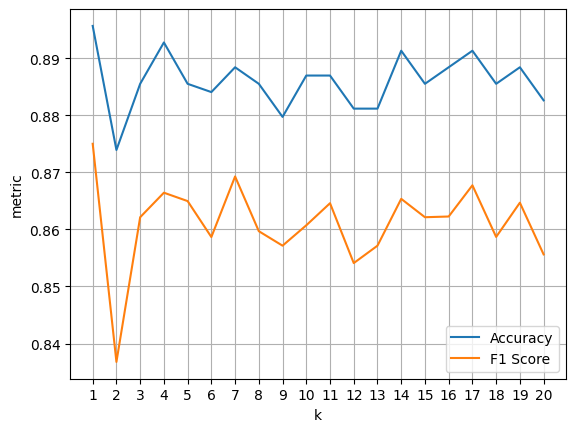

In [6]:
k_values = range(1, 21)
plt.plot(k_values, accuracy, label='Accuracy', linestyle='-')
plt.plot(k_values, f1_score, label='F1 Score', linestyle='-')

plt.xlabel('k')
plt.ylabel('metric')
plt.xticks(k_values)

plt.grid(True)
plt.legend()

plt.show()

## **MaxAbsScaler**

In [7]:
accuracy, f1_score = get_score(X, y, test_size=0.15, shuffle=True, random_state=23, scaler=MaxAbsScaler)

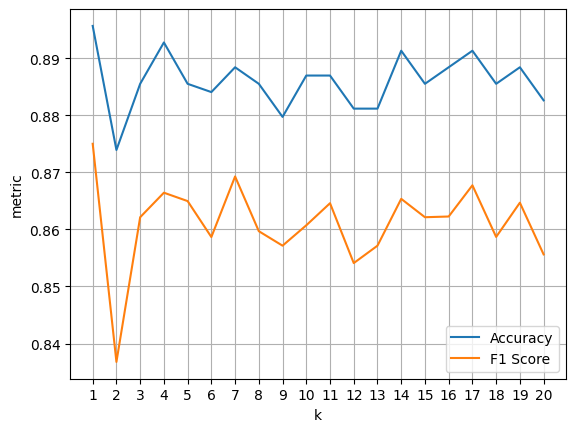

In [8]:
k_values = range(1, 21)
plt.plot(k_values, accuracy, label='Accuracy', linestyle='-')
plt.plot(k_values, f1_score, label='F1 Score', linestyle='-')

plt.xlabel('k')
plt.ylabel('metric')
plt.xticks(k_values)

plt.grid(True)
plt.legend()

plt.show()

## **StandardScaler**

In [9]:
accuracy, f1_score = get_score(X, y, test_size=0.15, shuffle=True, random_state=23, scaler=StandardScaler)

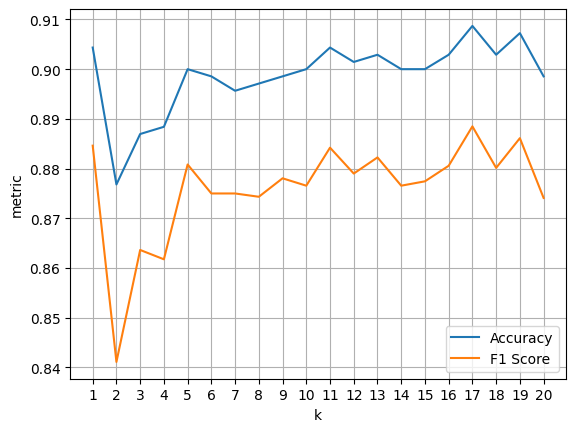

In [10]:
k_values = range(1, 21)
plt.plot(k_values, accuracy, label='Accuracy', linestyle='-')
plt.plot(k_values, f1_score, label='F1 Score', linestyle='-')

plt.xlabel('k')
plt.ylabel('metric')
plt.xticks(k_values)

plt.grid(True)
plt.legend()

plt.show()